In [1]:
import numpy as np
import matplotlib.pyplot as plt

The percentage of points to be considered: 100
Operation to be performed : 1. Rotation   2. Translation   3. Scaling  :-  3
Enter the scaling factor: 5


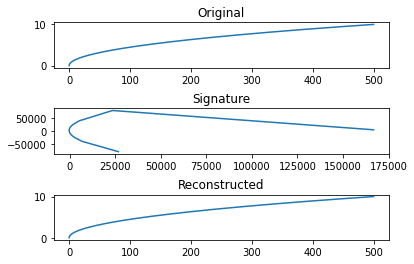

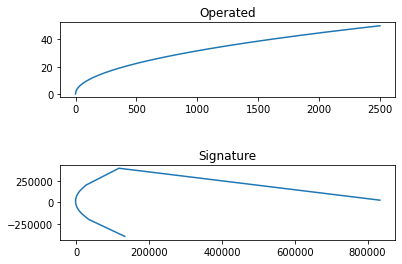

In [17]:
def func():
    x1 = np.linspace(0,10,1000)
    y = np.dot(x1*x1,5)
    f = y + x1*1j
    return f

total = 1000
percent = int(input("The percentage of points to be considered: "))
N = int((percent/100)*total)

def signature(f,N):
    complex_expo = [[0 for a in range(1000)] for b in range(1000)]
    np.array(complex_expo)
    for k in range(0,1000):
        for n in range(0,1000):
            complex_expo[k][n] =np.exp(-2j*np.pi*n*k/len(f))
    sign = np.dot(f,complex_expo)
    return f, sign,N

def reconstruction(sign,N):
    sign_partial = sign[0:N]
    inv_complex_expo = [[0 for a in range(N)] for b in range(N)]
    np.array(inv_complex_expo)
    for k in range(0,N):
        for n in range(0,N):
            inv_complex_expo[k][n] =np.exp(2j*np.pi*n*k/N)
    recon = (np.dot(inv_complex_expo,sign_partial))/N
    return recon

def plot(f,sign,*args):
    if args:
        recon = args[0]
        fig,axs = plt.subplots(3)
        axs[0].plot(f.real,f.imag)
        axs[0].set_title("Original")
        axs[1].plot(sign.real,sign.imag)
        plt.subplots_adjust(hspace=0.9)
        axs[1].set_title("Signature")
        axs[2].plot(recon.real,recon.imag)
        plt.subplots_adjust(hspace=0.9)
        axs[2].set_title("Reconstructed")
    else:
        fig,axs = plt.subplots(2)
        axs[0].plot(f.real,f.imag)
        axs[0].set_title("Operated")
        axs[1].plot(sign.real,sign.imag)
        plt.subplots_adjust(hspace=0.9)
        axs[1].set_title("Signature")

f = func()
f, s, N= signature(f,N)
r = reconstruction(s, N)
plot(f, s,r)

ch = int(input("Operation to be performed : 1. Rotation   2. Translation   3. Scaling  :-  "))
if ch==1:
    def rotate_p(point, origin, angle):
        radians = np.deg2rad(angle)
        x,y = point
        x1, y1 = origin
        x2 = (x - x1)
        y2 = (y - y1)
        cos_rad = np.cos(radians)
        sin_rad = np.sin(radians)
        r1 = x1 + cos_rad * x2 + sin_rad * y2
        r2 = y1 + -sin_rad * x2 + cos_rad * y2
        return r1, r2

    def rotate(f):
        angle = int(input ("Enter the angle in degrees: "))
        for i in range(1000):
            pt=(f[i].real, f[i].imag)
            orig=(0,0)
            pt_r=rotate_p(pt,orig,angle)
            np.array(pt_r)
            fx = np.asarray(pt_r)
            f[i] = fx[0]+fx[1]*1j
        return f

    f_ro=rotate(f)
    f, s, N= signature(f_ro,N)
    plot(f,s)

elif (ch==3):
    scale = int(input("Enter the scaling factor: "))
    f_scale= np.dot(f,scale)
    f_scaled, s, N= signature(f_scale,N)
    plot(f_scaled,s)
    
elif (ch==2):
    translate = int(input("Enter the translation degree: "))
    f_tran= f + translate
    f_trans, s, N= signature(f_tran,N)
    plot(f_trans,s)

else:
    print("Invalid choice!")